In [6]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# df = pd.read_csv('/Users/aaron/Downloads/student_grades - Sheet1.csv')

In [13]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1v0pQRKYcoiDT0Uy7ufr4t2StG51N7S11JFpahJYqSFk/edit#gid=0'

In [14]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [18]:
## LOOK INTO READING FROM URL LATER
# pd.read_csv(csv_export_url)

ParserError: Error tokenizing data. C error: Expected 200 fields in line 3, saw 266


# Acquire function

In [75]:
def acquire_data():
    '''
    Arguments: None
    Actions:
        1. Checks for file existence in current working directory
        2. Opens file if it exists
    Returns: student_grades df
    Modules: pandas as pd
    '''
    filename= 'student_grades.csv'

    if os.path.exists(filename):
        df = pd.read_csv(filename)
    
    return df

### Summarize data and gain cleaning insights

In [19]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


In [25]:
# looking into the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


In [26]:
df.shape

(104, 5)

**Takeaways:**
* There are missing values in exam1 and in exam 3
* Student id is arbitrary
* Is there any reason for the float values? Investigate this
    * If there is a reason, is there a reason why the final grades are integers? Is there rounding happening?


In [28]:
# cleaning - drop column
df = df.drop(columns='student_id')
# if we want the student_id to stay, we can change the index to represent the student_id but its unnecesary right now

In [41]:
# time to inspect the null values
df.exam1[df.exam1.isna() == True]

93   NaN
Name: exam1, dtype: float64

In [43]:
df.exam3[df.exam3.isna() == True]

85   NaN
Name: exam3, dtype: float64

In [44]:
# checking for corectness
df.dropna().shape

(102, 4)

In [45]:
# dropping na's
df = df.dropna()
# Why? for simplicity, we also dont know the reason for the missing grade, 
# it will also damage the model because the data set is small and it may throw off the model

In [47]:
# let's chekc the floats vs integers
df.exam1.value_counts()

70.0     16
100.0     8
98.0      8
83.0      8
93.0      8
79.0      8
92.0      8
62.0      8
58.0      8
57.0      8
85.0      7
73.0      7
Name: exam1, dtype: int64

In [60]:
# cast it as a string and see if all the ending values are .0
df.exam3.astype(str).str.endswith('.0').value_counts()

True    102
Name: exam3, dtype: int64

In [64]:
# other method for exam 1
(df.exam1.astype(int) == df.exam1).value_counts()

# in boh cases, they can be integers

True    102
Name: exam1, dtype: int64

In [65]:
# changing the items into integers
df['exam1'] = df.exam1.astype(int)
df['exam3'] = df.exam3.astype(int)


In [68]:
def clean_data(df):
    '''
    Arguments:
    Actions: 
        1. Drops student id columns
        2. Drops null values
        3. Cast all series to integer data types
    Returns: cleaned df
    Modules: pandas as pd
    '''
    # removes unnecessary column
    df = df.drop(columns='student_id')
    
    # drops null/missing values
    df = df.dropna()
    
    # changes data types of floats to int
    df = df.astype(int)
    
    return df

In [70]:
from sklearn.model_selection import train_test_split

In [76]:
def split_data(df):
    '''
    Arguments: clean df
    Actions: Splits data into train, test, validate
    Returns: train, validate, test
    Modules: from sklearn.model_selection import train_test_split
    '''
    # split data into 2, focus on test
    train_val, test = train_test_split(df, random_state=1349, train_size=.8)
    
    # split data into train, validate
    train, validate = train_test_split(train_val, random_state=1349, train_size=.7)
    
    # return split data
    return train, validate, test

In [74]:
train, validate, test = split_data(clean_data(acquire_data()))

Here


In [78]:
def wrangle_data():
    '''
    Arguments: none
    Actions: Runs through the wrangle process and returns 
    Returns:
    Modules:
    '''
    
    train, validate, test = split_data(clean_data(acquire_data()))
    
    return train, validate, test

In [80]:
train, validate, test = wrangle_data()

In [82]:
train.shape, validate.shape, test.shape

((56, 4), (25, 4), (21, 4))

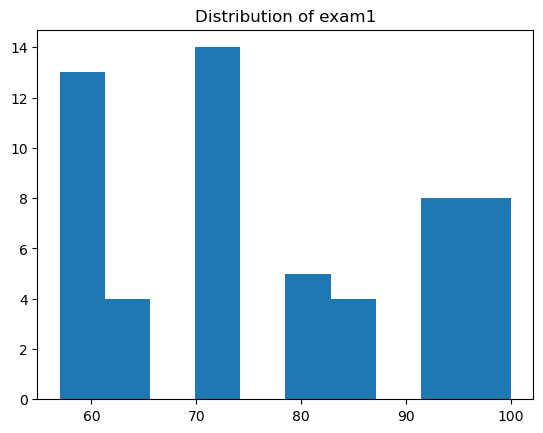

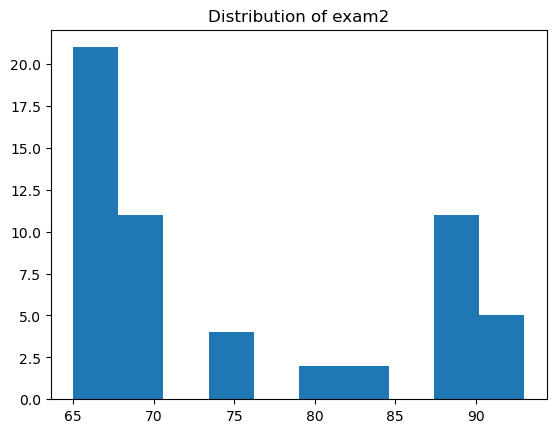

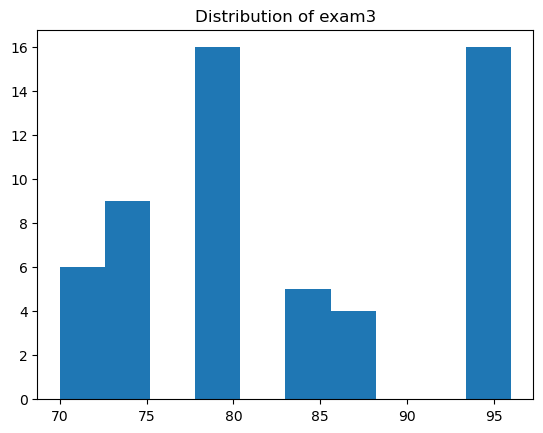

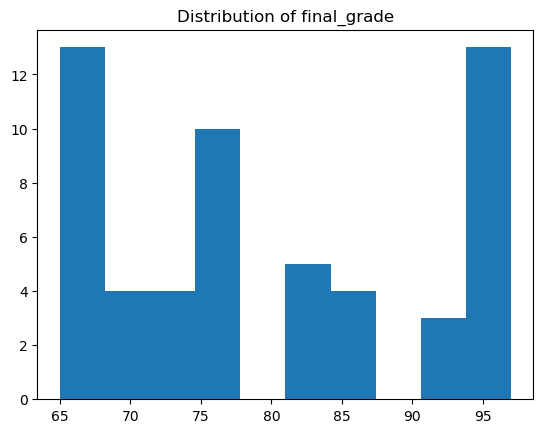

In [84]:
# Look for normal distrubtion
for col in train:
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()

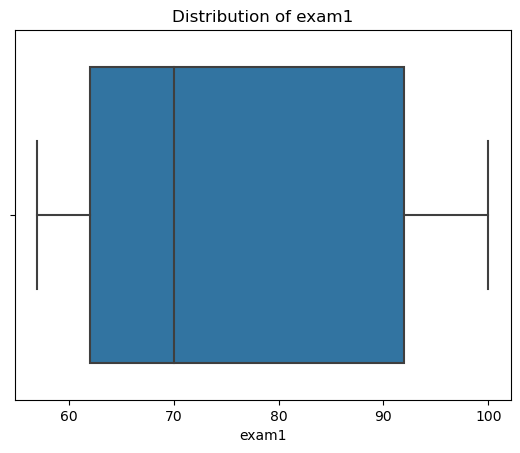

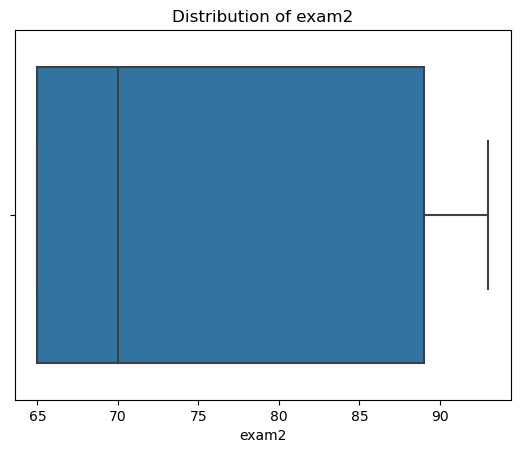

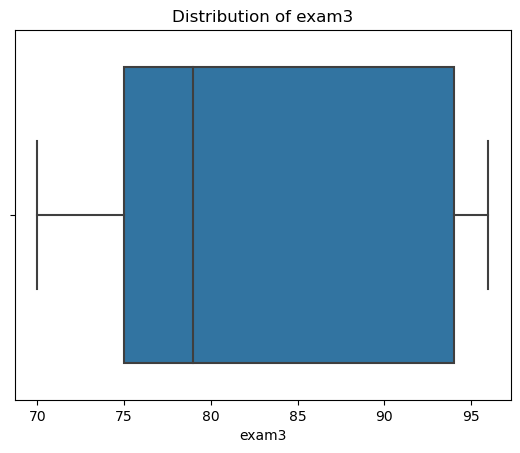

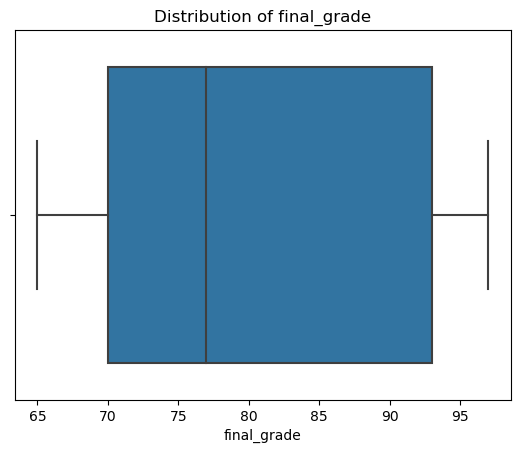

In [87]:
for col in train:
    sns.boxplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [89]:
train.describe()

,exam1,exam2,exam3,final_grade
count,56.000000,56.000000,56.000000,56.000000
mean,75.767857,75.232143,82.946429,79.910714
std,14.995746,10.919526,9.054220,11.438812
min,57.000000,65.000000,70.000000,65.000000
25%,62.000000,65.000000,75.000000,70.000000
50%,70.000000,70.000000,79.000000,77.000000
75%,92.000000,89.000000,94.000000,93.000000
max,100.000000,93.000000,96.000000,97.000000


**Takeaways:**
* nothing is normal, likely becasue they are from a small sample
    * Will this effect my modeling?
* I think we should be using the

### Question: Can the exam scores be used to predict the final grade?